# Time Series Analysis - Non Stationary

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset=pd.read_csv(r"/Users/SyeedSyed/Documents/Learnings/DS_and_ML/DATA/AirPassengers.csv")

In [7]:
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [8]:
# Convert to proper datatime format
pd.to_datetime(dataset["Month"])

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [9]:
dataset["Month"] = pd.to_datetime(dataset["Month"])

In [10]:
dataset

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [11]:
# Difference between previous record and current record in days
dataset["Month"].diff()

0         NaT
1     31 days
2     28 days
3     31 days
4     30 days
        ...  
139   31 days
140   31 days
141   30 days
142   31 days
143   30 days
Name: Month, Length: 144, dtype: timedelta64[ns]

In [12]:
dataset["Month"].diff().dt.days

0       NaN
1      31.0
2      28.0
3      31.0
4      30.0
       ... 
139    31.0
140    31.0
141    30.0
142    31.0
143    30.0
Name: Month, Length: 144, dtype: float64

In [13]:
dataset["Month"].diff().dt.days>31

0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141    False
142    False
143    False
Name: Month, Length: 144, dtype: bool

In [14]:
# Any date greater than 31. Invalid dates
dataset["Month"][dataset["Month"].diff().dt.days>31]

Series([], Name: Month, dtype: datetime64[ns])

In [15]:
dataset

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [16]:
dataset.set_index("Month",inplace=True)

In [17]:
dataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Check if Stationary

##### Look at plots

In [18]:
dataset.sort_index(inplace=True)

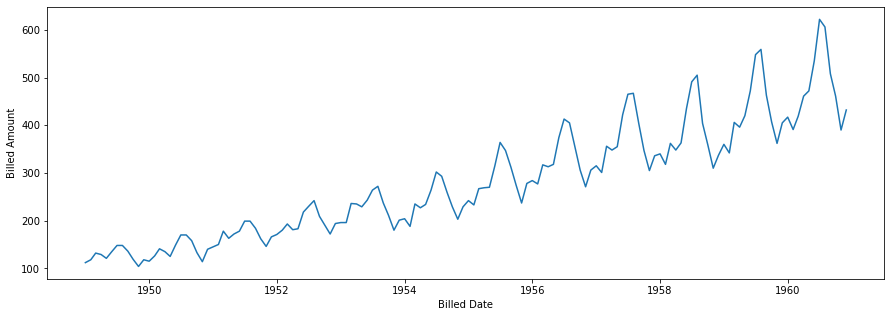

In [19]:
plt.figure(figsize = (15,5))
plt.plot(dataset)
plt.xlabel("Billed Date")
plt.ylabel("Billed Amount")
plt.show()

In [20]:
dataset.head().mean()

#Passengers    122.4
dtype: float64

In [21]:
dataset.iloc[100:106,:].mean()

#Passengers    410.0
dtype: float64

In [22]:
dataset.tail().mean()

#Passengers    479.4
dtype: float64

In [23]:
dataset.head().var()

#Passengers    66.3
dtype: float64

In [24]:
dataset.tail().var()

#Passengers    6855.8
dtype: float64

In [25]:
dataset.iloc[20:25,:].var()

#Passengers    263.5
dtype: float64

### AD Fuller Test

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
result = adfuller(dataset)

In [28]:
# P-Value -- Significance Level or Probability Value
p_cal = result[1]

In [29]:
p_cal

0.991880243437641

In [30]:
if(p_cal>0.05):
    print("Series is Not Stationary")
else:
    print("Series is Stationary")

Series is Not Stationary


#### Now convert the Non Stationary Series to Stationary Series

##### Plot ACF and PACF

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

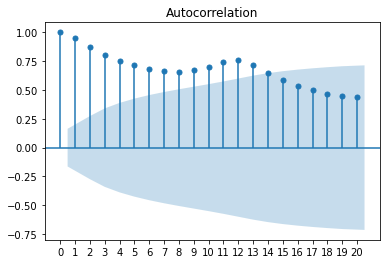

In [32]:
plot_acf(dataset,lags=20)
plt.xticks(range(0,21))
plt.show()

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf

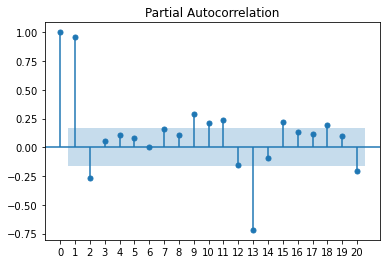

In [34]:
plot_pacf(dataset,lags=20)
plt.xticks(range(0,21))
plt.show()

##### Differencing/Smoothing - Convert the Non Stationary Series to Stationary Series. Perform differencing until we get Stationary series

In [35]:
dataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [36]:
dataset.shift(1)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,112.0
1949-03-01,118.0
1949-04-01,132.0
1949-05-01,129.0
...,...
1960-08-01,622.0
1960-09-01,606.0
1960-10-01,508.0


In [37]:

temp = dataset-dataset.shift(1)

In [38]:
temp

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


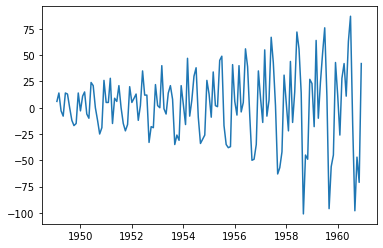

In [39]:
plt.plot(temp)

In [40]:
# Drop Na
temp=temp.dropna()

### AD Fuller

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
result = adfuller(temp)

In [43]:
# P-Value -- Significance Level or Probability Value
p_cal = result[1]

In [44]:
p_cal

0.05421329028382789

In [45]:
if(p_cal>0.05):
    print("Series is Not Stationary")
else:
    print("Series is Stationary")

Series is Not Stationary


In [46]:
temp2 = temp-temp.shift(1)

In [47]:
temp2

,#Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


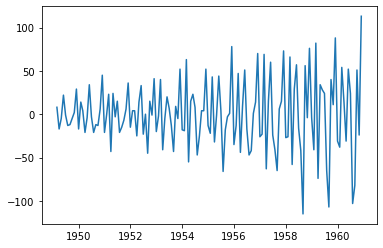

In [48]:
plt.plot(temp2)

In [49]:
temp2=temp2.dropna()

In [50]:
result = adfuller(temp2)

In [51]:
p_cal = result[1]

In [52]:
p_cal

2.7328918500141235e-29

In [53]:
if(p_cal>0.05):
    print("Series is Not Stationary")
else:
    print("Series is Stationary")

Series is Stationary


### ARIMA
1. AR - Auto Regression
2. I - Integrative - (Differencing)
3. MA - Moving Average

In [54]:
'''
ARIMA model has inbuilt feature of Differincing.(Integrative)
Differincing with ARMA is ARIMA

p - Order of Auto Regression
D - Order of Differencing
q - Order of Moving Average

'''

'\nARIMA model has inbuilt feature of Differincing.(Integrative)\nDifferincing with ARMA is ARIMA\n\np - Order of Auto Regression\nD - Order of Differencing\nq - Order of Moving Average\n\n'

### Split in to Train and Test

In [55]:
dataset.isnull().any()

#Passengers    False
dtype: bool

In [56]:
dataset.shape

(144, 1)

In [57]:
threshold=int(dataset.shape[0]*10/100)

In [58]:
len(dataset)-threshold

130

In [59]:
train = dataset.iloc[0:len(dataset)-threshold,:]

In [60]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-06-01,472
1959-07-01,548
1959-08-01,559


In [61]:
test = dataset.iloc[len(dataset)-threshold:,:]

In [62]:
test

,#Passengers
Month,
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622


In [63]:
test.shape

(14, 1)

In [64]:
train.shape

(130, 1)

In [65]:
from statsmodels.tsa.arima_model import ARIMA

In [66]:
#Order = (p,d,q)
#P - Auto Regression
#D - Diff
#Q - Moving Average
arima_model = ARIMA(train,order=(2,2,2))

/Users/SyeedSyed/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/SyeedSyed/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so 

In [67]:
arima_model = arima_model.fit()

/Users/SyeedSyed/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [114]:
len(train)

130

In [115]:
len(dataset)

144

In [116]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-06-01,472
1959-07-01,548
1959-08-01,559


In [117]:
pred = arima_model.predict(start=len(train),end=len(dataset)-1)

In [118]:
pred

1959-11-01    48.876190
1959-12-01     7.882160
1960-01-01     1.576159
1960-02-01     0.091956
1960-03-01     0.123453
1960-04-01    -0.061563
1960-05-01     0.035514
1960-06-01    -0.034619
1960-07-01     0.011880
1960-08-01    -0.019606
1960-09-01     0.001601
1960-10-01    -0.012702
1960-11-01    -0.003059
1960-12-01    -0.009561
Freq: MS, dtype: float64

In [119]:
test

,#Passengers
Month,
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622


### Inverse of Differencing

In [120]:
'''
yt - y(t-1) - y(t-2) = e

yt  = e + y(t-1) + y(t-2)

'''

'\nyt - y(t-1) - y(t-2) = e\n\nyt  = e + y(t-1) + y(t-2)\n\n'

In [121]:
datayt2 = dataset.iloc[len(train)-2:,0]

In [122]:
datayt2

Month
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [123]:
test

,#Passengers
Month,
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622


In [124]:
datayt2

Month
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [125]:
datayt2[:-2]

Month
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
Name: #Passengers, dtype: int64

In [126]:
# ADD based on values instead of key
pred_final = pred.values + datayt2[:-2].values

In [127]:
pred_final

array([511.87619024, 414.88215956, 363.57615901, 405.09195608,
       417.12345336, 390.93843665, 419.03551389, 460.96538123,
       472.01187954, 534.98039353, 622.0016011 , 605.98729762,
       507.99694141, 460.99043877])

In [128]:
pred_final = pd.Series(pred_final,index=pred.index)

In [129]:
pred_final = pred_final.dropna()

In [130]:
pred_final

1959-11-01    511.876190
1959-12-01    414.882160
1960-01-01    363.576159
1960-02-01    405.091956
1960-03-01    417.123453
1960-04-01    390.938437
1960-05-01    419.035514
1960-06-01    460.965381
1960-07-01    472.011880
1960-08-01    534.980394
1960-09-01    622.001601
1960-10-01    605.987298
1960-11-01    507.996941
1960-12-01    460.990439
Freq: MS, dtype: float64

In [131]:
test

,#Passengers
Month,
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622


In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
mse= mean_squared_error(test,pred_final)

mse

In [134]:
mse

8223.8107978079

In [135]:
rmse=np.sqrt(mse)

In [136]:
rmse

90.68522921516988

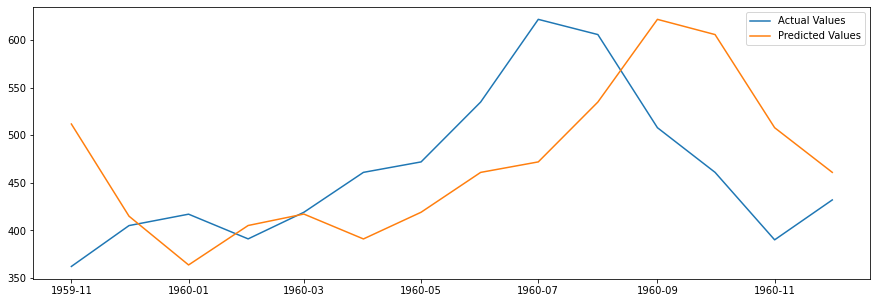

In [137]:
plt.figure(figsize=(15,5))
plt.plot(test,label = "Actual Values")
plt.plot(pred_final,label = "Predicted Values")
plt.legend()
plt.show()

In [138]:
'''

Assignment - first two months take preious two values. From next dont take actual values but take prediected values.
'''

'\n\nAssignment - first two months take preious two values. From next dont take actual values but take prediected values.\n'

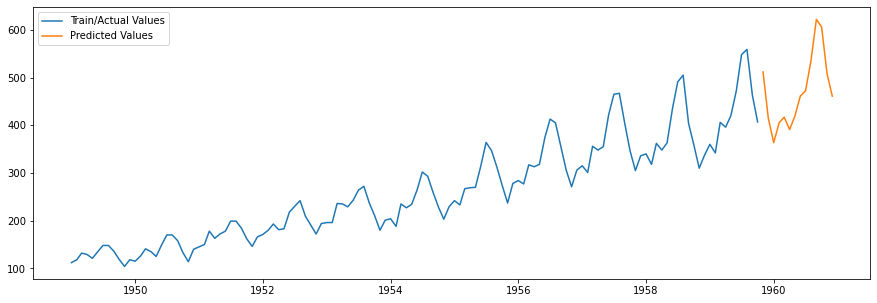

In [139]:
plt.figure(figsize=(15,5))
plt.plot(train,label = "Train/Actual Values")
plt.plot(pred_final,label = "Predicted Values")
plt.legend()
plt.show()

In [142]:
pred.reset_index(drop=True,inplace = True)

In [143]:
for i in range(2,len(pred)):
    pred[i] = pred[i] + pred[i-2]
    

In [144]:
pred

0      48.876190
1       7.882160
2      99.328539
3      15.856275
4     149.904342
5      23.768828
6     200.515659
7      31.646761
8     251.138855
9      39.505088
10    301.763652
11     47.350713
12    352.385390
13     55.186776
dtype: float64